In [1]:
import numpy as np
from pathlib import Path
import logging

In [2]:
IMG_SIZE = (9000, 9000)
OUT_PATH = Path("out")

if not OUT_PATH.exists():
    OUT_PATH.mkdir()

logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

logger = logging.getLogger()

In [3]:
from scrs import Simage

# Generate an image with 1000 stars. Only save the last operation.
img = (
    Simage()
    .set_data(np.zeros(IMG_SIZE))
    .add_readout(readout_noise=100, readout_offset=0)
    .add_stars(num_stars=1000, max_sigma=25)
)

INFO:scrs.image.image:Ran set_data on image.
INFO:scrs.image.simage:Ran add_readout on image.
INFO:scrs.image.simage:Ran add_stars on image.


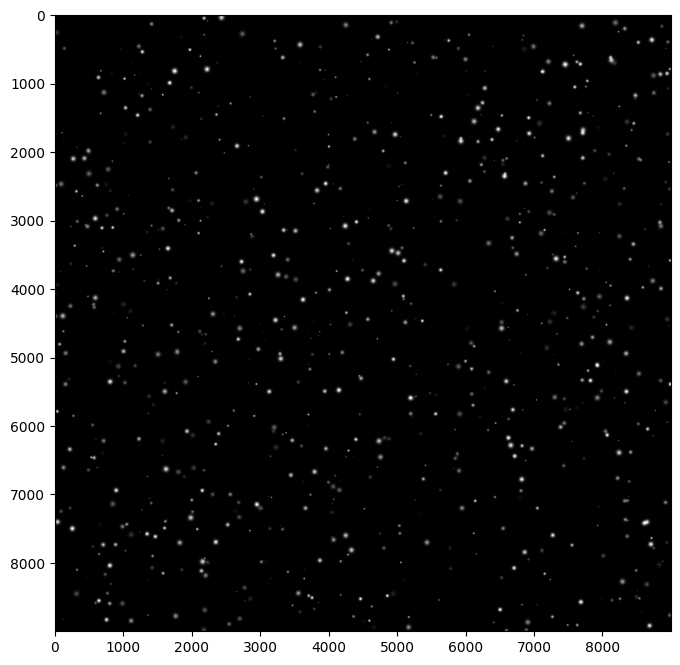

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(img.data, cmap="gray", vmin=0, vmax=65536)
plt.show()